Hello All ! This is pretty basic tutorial to start off with **Convolutional networks**.

Let's start with a bit of introduction Convolutional neural networks are primarily used to classify images or identify pattern similarities between them. So a convolutional network receives a normal color image as a rectangular box whose width and height are measured by the number of pixels along those dimensions, and whose depth is three layers deep, one for each letter in RGB. Those depth layers are referred to as **channels**. For simplification needs we will only consider gray scale image here.



**Import Libraries**

There are basically 4 type of libraries which you have to import

1. Pandas :- For reading / writing data
2. Matplotlib to display images
3. Tensorflow Keras models :- Need a model to predict right !! 
4. Tensorflow Keras layers :- Every NN needs layers and CNN needs well a couple of layers.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

import zipfile

with zipfile.ZipFile("./train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("./test1.zip","r") as z:
    z.extractall(".")

# Any results you write to the current directory are saved as output.

#print(os.listdir("/kaggle/working/train"))

['cats-vs-dogs-basic-cnn-tutorial.ipynb', 'dogs-vs-cats.zip', 'sampleSubmission.csv', 'test1', 'test1.zip', 'train', 'train.zip']


KeyboardInterrupt: 

We need to train a model first so we will check training data In the below code we are iterating through all images in train folder and then we will split image name with deliminiter "." We have names like dog.0, dog.1, cat.2 etc.. Hence after splitting we are gonna get results like "dog', "cat" as category value of the image. To make this example more easy we will consider dog as "1" and cat as "0"




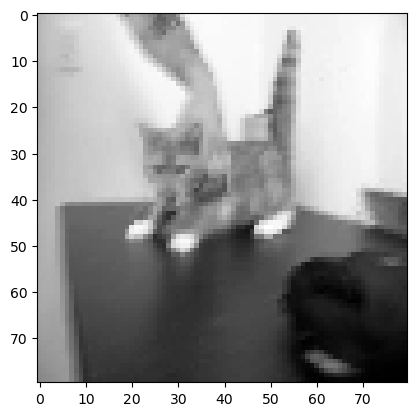

In [18]:
main_dir = "./working/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break


Okay so the above code was more for understanding purpose. Nowe we will get to the real part of coding here.

Declare your training array X and your target array y. Here X will be the array of pixels and y will be value 0 or 1 indicating its a dog or cat
Write convert function to map category "dog" or "cat" into 1 and 0

Create a function create_test_data which takes all training images into a loop. Converts into image array.Resize image into 80 X80. Append image into X array. Append category value into y array.

In [19]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
    

Now what..

Call the function

But also later convert X and y into numpy array We also have to reshape X with the below code

np.array(X).reshape(-1, 80,80,1)

I really don't know why we are using reshaping here. If anyone knows please do write in comments


In [20]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

If you want to save your processed training (X) and target (y) you can use **pickle**. Please refer the below code for this. I wrote this to experiment but its not really needed. But anyways I still think its better to learn. :)

In [ ]:
#import pickle

#pickle.dump( X, open( "train_x", "wb" ) )
#pickle.dump( y, open( "train_y", "wb" ) )


If you see the values of X you can see a variety of values between 0- 255 . Its because every pixel has different density of black and white. But with the wide range of values it becomes difficult for a training model to learn ( sometimes memorize ). 

How to resolve this And you guessed it right . You can **normalize** the data. We can use Keras normalize here also . But well we already know all values are having range between 0-255 so we can just divide it by 255 and get all values scaled between 0 -1

That's what we have done below. You can skip this step to see the difference between accuracy. Don't believe everything I say. Experiment and see for yourself


In [21]:
#Normalize data
X = X/255.0



**Loss** :- To make our model better we either minimize loss or maximize accuracy. NN always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy

**Optimizer** :- If you know a lil bit about mathematics of machine learning you might be familier with local minima or global minima or cost function. To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is **adam**

**Metrics** :- This is to denote the measure of your model. Can be accuracy or some other metric.
        

In [22]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now we will fit our model with training data.

Epochs :- How many times our model will go through data

Batch size :- How much amount of data at once you wanna pass through the model

validation_split :- How much amount of data (in this case its 20 %) you will need to check cross validation error

In [23]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 119ms/step - accuracy: 0.6592 - loss: 0.6226 - val_accuracy: 0.7990 - val_loss: 0.4568
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.7638 - loss: 0.4848 - val_accuracy: 0.5138 - val_loss: 0.8551
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 0.7966 - loss: 0.4320 - val_accuracy: 0.7568 - val_loss: 0.5194
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.8263 - loss: 0.3880 - val_accuracy: 0.6656 - val_loss: 0.7004
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.8460 - loss: 0.3459 - val_accuracy: 0.6850 - val_loss: 0.7099
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 185ms/step - accuracy: 0.8785 - loss: 0.2872 - val_accuracy: 0.7016 - val_loss: 0.7623
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 183ms/step - accuracy: 0.9050 - loss: 0.2311 - val_accuracy: 0.7000 - val_loss: 0.8115
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.9358 - los

Now we have to preporcess our test data also same as that our training data.

In [46]:

train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

Ok. Now the time has come to finally
**PREDICT**

so feed your model with test data to predict

In [47]:
predictions = model.predict(X_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step


We are rounding the result here as we used sigmoid function and we got the probablity values in our predicted dataset

In [48]:
predicted_val = [int(round(p[0])) for p in predictions]

Now you have to make submission data frame to submit your resultset

In [49]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

Write your data frame to a csv file

In [50]:
submission_df.to_csv("submission.csv", index=False)

And Voila we are done !!

Please do read this kernel and leave your comments for feedback and questions.

Thanks all :)